# Cel: Oczyszczenie danych w celu dalszej transformacji

## Import niezbędnych bibliotek

In [2]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from numbers import Number

/tmp/ipykernel_9879/213448753.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = 'books.csv'

In [4]:
df = pd.read_csv(file_path)
df

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,NaN,NaN,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,NaN,NaN,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,NaN,NaN,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624.0,Hardcover,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,NaN,NaN,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724.0,Hardcover,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",NaN,NaN,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284.0,Hardcover,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304.0,Hardcover,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020


In [5]:
col_oceny = 'Rating'

df_sorted = df.sort_values(by=col_oceny, ascending=False)

df_sorted

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
391,391,For Reading Out Loud,NaN,NaN,Margaret Mary Kimmel,A comprehensive guide for parents lists more t...,266.0,Hardcover,['Nonfiction'],"January 1, 1983",real,16
3292,3292,The Witch Is Back,Underworld,4,H.P. Mallory,The witching hour has arrived in bestselling a...,368.0,Mass Market Paperback,"['Paranormal', 'Paranormal Romance', 'Romance'...","July 1, 2012",real,6155
453,453,Ma Rainey's Black Bottom,NaN,NaN,August Wilson,The time is 1927. The place is a rundown recor...,111.0,Paperback,"['Plays', 'Drama', 'Fiction', 'Historical Fict...","January 1, 1984",real,3492
300,300,The Color of Magic,"Discworld, Rincewind","1,1",Terry Pratchett,In a world supported on the back of a giant tu...,228.0,Paperback,"['Fantasy', 'Fiction', 'Humor', 'Comedy', 'Sci...","December 1, 1983",real,382549
1542,1542,The Watsons Go to Birmingham - 1963,NaN,NaN,Christopher Paul Curtis,"The Newbery Honor-winning American classic, \n...",224.0,Paperback,"['Historical Fiction', 'Young Adult', 'Middle ...","January 1, 1995",real,67297
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,A Gate at the Stairs,NaN,NaN,Lorrie Moore,A novel on the anxiety and disconnection of po...,322.0,Hardcover,"['Fiction', 'Novels', 'Contemporary', 'Literar...","September 1, 2009",3.17,18113
2882,2882,A Katrina Moment,NaN,NaN,Alexandra Everist,A Katrina Moment relates the tale of two lover...,160.0,Paperback,[],"May 19, 2008",3.16,19
2468,2468,The Jane Austen Book Club,NaN,NaN,Karen Joy Fowler,The Extraordinary \n Bestseller\n \n In Califo...,288.0,Paperback,"['Fiction', 'Chick Lit', 'Romance', 'Contempor...","April 22, 2004",3.10,69687
87,87,The Green Book,NaN,NaN,Muammar Gaddafi,"English, Arabic (translation)",NaN,['112 pages'],"['Politics', 'Nonfiction', 'Philosophy', 'Liby...","January 1, 1975",2.97,1330


### Wysokość oceny - real? Wartość nienumeryczna i niemierzalna.

In [6]:
# Szukamy wartości nienumerycznych w kolumnie Rating.
non_integer_rows = df[col_oceny].apply(pd.to_numeric, errors='coerce').isna()

# Zliczamy wiersze zawierające nienumeryczne wartości
count_non_integer_rows = non_integer_rows.sum()

# Wynik
print(f'Kolumna "{col_oceny}" posiada {count_non_integer_rows} wierszy z wartością nienumeryczną.')


Kolumna "Rating" posiada 67 wierszy z wartością nienumeryczną.


In [7]:
def replace_non_numeric(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.random.uniform(3.5, 4.5)

df[col_oceny] = df[col_oceny].apply(replace_non_numeric)

df

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,NaN,NaN,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,NaN,NaN,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,NaN,NaN,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624.0,Hardcover,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,NaN,NaN,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724.0,Hardcover,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",NaN,NaN,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284.0,Hardcover,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304.0,Hardcover,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020


In [8]:
df_sorted = df.sort_values(by=col_oceny, ascending=False)
df_sorted

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
2542,2542,The Complete Calvin and Hobbes,NaN,NaN,Bill Watterson,[ \n\n\nBox Set\n\n\n | \nBook One\n | \nBook ...,1456.0,Hardcover,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...","September 6, 2005",4.81,39934
3449,3449,Words of Radiance,The Stormlight Archive,2,Brandon Sanderson,", Book Two of the Stormlight Archive, continue...",1087.0,Hardcover,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...","March 4, 2014",4.76,335442
1611,1611,It's a Magical World,Calvin and Hobbes,11,Bill Watterson,When cartoonist Bill Watterson announced that ...,176.0,Paperback,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...","September 1, 1996",4.73,28225
4364,4364,Magic Claims,"Kate Daniels: Wilmington Years, Kate Daniels","2,10.6",Ilona Andrews,Kate and Curran have just settled into their n...,240.0,Kindle Edition,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Ma...","June 13, 2023",4.72,10642
1621,1621,There's Treasure Everywhere,Calvin and Hobbes,10,Bill Watterson,In the world that Calvin and his stuffed tiger...,176.0,Paperback,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...","March 1, 1996",4.71,21569
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,A Gate at the Stairs,NaN,NaN,Lorrie Moore,A novel on the anxiety and disconnection of po...,322.0,Hardcover,"['Fiction', 'Novels', 'Contemporary', 'Literar...","September 1, 2009",3.17,18113
2882,2882,A Katrina Moment,NaN,NaN,Alexandra Everist,A Katrina Moment relates the tale of two lover...,160.0,Paperback,[],"May 19, 2008",3.16,19
2468,2468,The Jane Austen Book Club,NaN,NaN,Karen Joy Fowler,The Extraordinary \n Bestseller\n \n In Califo...,288.0,Paperback,"['Fiction', 'Chick Lit', 'Romance', 'Contempor...","April 22, 2004",3.10,69687
87,87,The Green Book,NaN,NaN,Muammar Gaddafi,"English, Arabic (translation)",NaN,['112 pages'],"['Politics', 'Nonfiction', 'Philosophy', 'Liby...","January 1, 1975",2.97,1330


### Standaryzacja kolumny Rating, zaokrąglamy do 2 miejsc po przecinku

In [9]:
df['Rating'] = df['Rating'].round(2)

### Zmiana ilości stron z typu float na integer.

In [10]:
book_pages = df['Num Pages']

df = df[~book_pages.isnull()]

df[['Num Pages']] = df[['Num Pages']].astype(int)

df

/tmp/ipykernel_9879/3600488554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Num Pages']] = df[['Num Pages']].astype(int)


,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,NaN,NaN,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,NaN,NaN,Stephen King,The Department of Scientific Intelligence (aka...,564,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,NaN,NaN,Carl Sagan,The story of fifteen billion years of cosmic e...,384,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624,Hardcover,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,NaN,NaN,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724,Hardcover,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",NaN,NaN,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284,Hardcover,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304,Hardcover,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020


### Nadanie wartości 'Brak danych' dla brakujących wartości. Spolszczenie unikalnych nazw okładek.

In [11]:
df = df.fillna('Brak danych')
df

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,Brak danych,Brak danych,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,Brak danych,Brak danych,Stephen King,The Department of Scientific Intelligence (aka...,564,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,Brak danych,Brak danych,Carl Sagan,The story of fifteen billion years of cosmic e...,384,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624,Hardcover,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,Brak danych,Brak danych,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724,Hardcover,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",Brak danych,Brak danych,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284,Hardcover,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304,Hardcover,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020


In [12]:
df['Format'].unique()

array(['Paperback', 'Mass Market Paperback', 'Hardcover',
       'Library Binding', 'Kindle Edition', 'hardcover', 'Audio Cassette',
       'Board Book', 'Board book', 'Broschiert', 'paper', 'ebook',
       'Unknown Binding', 'Trade Paperback', 'Audio CD', 'Audiobook',
       'Slipcased Hardcover', 'Print', 'Nook'], dtype=object)

In [13]:
df['Format'] = df['Format'].replace({
    'Mass Market Paperback': 'Papierowa okładka',
    'Paperback': 'Papierowa okładka',
    'Hardcover': 'Twarda oprawa',
    'Library Binding': 'Oprawa Biblioteczna',
    'Kindle Edition': 'Wersja Kindle',
    'Board Book': 'Kartonowa',
    'Board book': 'Kartonowa',
    'Broschiert': 'Broszura',
    'paper': 'Papier',
    'Unknown Binding': 'Nieznana Oprawa',
    'Trade Paperback': 'Okładka wymienna',
    'Audio CD': 'Płyta CD',
    'Slipcased Hardcover': 'W twardej oprawie',
    'Print': 'Druk',
    'Nook': 'Zilustrowana okładka'
})

print(df['Format'].unique())
df

['Papierowa okładka' 'Twarda oprawa' 'Oprawa Biblioteczna' 'Wersja Kindle'
 'hardcover' 'Audio Cassette' 'Kartonowa' 'Broszura' 'Papier' 'ebook'
 'Nieznana Oprawa' 'Okładka wymienna' 'Płyta CD' 'Audiobook'
 'W twardej oprawie' 'Druk' 'Zilustrowana okładka']


,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250,Papierowa okładka,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,Brak danych,Brak danych,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536,Papierowa okładka,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512,Papierowa okładka,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,Brak danych,Brak danych,Stephen King,The Department of Scientific Intelligence (aka...,564,Papierowa okładka,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,Brak danych,Brak danych,Carl Sagan,The story of fifteen billion years of cosmic e...,384,Papierowa okładka,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624,Twarda oprawa,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,Brak danych,Brak danych,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724,Twarda oprawa,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",Brak danych,Brak danych,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284,Twarda oprawa,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304,Twarda oprawa,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020


## Podzielmy gatunki filmów wg. osobnych gatunków.

In [14]:
def process_genres(genres):
    return ', '.join(genres.strip("[]").replace("'", "").split(", "))

# Apply the function to the 'Genres' column
df['FormattedGenres'] = df['Genres'].apply(lambda x: process_genres(x))
df

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters,FormattedGenres
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250,Papierowa okładka,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375,"Science Fiction, Fiction, Humor, Fantasy, Come..."
1,1,The Name of the Rose,Brak danych,Brak danych,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536,Papierowa okładka,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732,"Fiction, Historical Fiction, Mystery, Classics..."
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512,Papierowa okładka,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630,"Historical Fiction, Fiction, Fantasy, Historic..."
3,3,Firestarter,Brak danych,Brak danych,Stephen King,The Department of Scientific Intelligence (aka...,564,Papierowa okładka,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270,"Horror, Fiction, Thriller, Science Fiction, Fa..."
4,4,Cosmos,Brak danych,Brak danych,Carl Sagan,The story of fifteen billion years of cosmic e...,384,Papierowa okładka,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686,"Science, Nonfiction, Physics, Astronomy, Histo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624,Twarda oprawa,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662,"Fantasy, Romance, Adult, Young Adult, Fiction,..."
4396,4396,The Covenant of Water,Brak danych,Brak danych,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724,Twarda oprawa,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236,"Fiction, Historical Fiction, India, Audiobook,..."
4397,4397,"Poverty, by America",Brak danych,Brak danych,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284,Twarda oprawa,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676,"Nonfiction, Politics, Sociology, History, Econ..."
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304,Twarda oprawa,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020,"Mystery, Audiobook, Fiction, Mystery Thriller,..."


In [21]:
unique_genres = set(','.join(df['FormattedGenres']).split(','))
print(len(unique_genres))
print(unique_genres)

564
{'', 'Romance', ' Magic', ' Audiobook', ' Gardening', ' Theatre', ' Popular Science', ' French Literature', ' Mystery Thriller', ' Apocalyptic', ' Horses', ' Portuguese Literature', ' Baseball', ' Short Stories', ' Iran', ' Dragonlance', ' Military Science Fiction', ' Cults', ' Racing', ' Family', ' Atheism', ' Canada', ' Geography', ' Erotic Romance', ' Dungeons and Dragons', ' Computer Science', ' galiza', ' Rwanda', ' Productivity', ' Animal Fiction', ' Space Opera', ' Quantum Mechanics', ' Travelogue', ' Book Club', ' Egypt', ' Mythology', ' British Literature', ' Comic Book', ' Fantasy', ' Sociology', ' Buddhism', ' Health', ' Murder Mystery', ' Medicine', ' hespaña', ' Teaching', ' Fairy Tales', ' Gothic', ' Adventure', ' Chinese Literature', ' Crafts', 'Angels', ' Horse Racing', 'Historical Romance', 'Picture Books', 'Sports Romance', ' Chapter Books', ' Womens Fiction', ' Plays', ' Nobel Prize', ' Latin American Literature', ' 2nd Grade', ' M M Contemporary', 'Writing', ' P

In [26]:
import re

def count_numeric_values(strings):
    numeric_count = 0
    for string in strings:
        # Use regular expression to find numeric patterns
        numeric_values = re.findall(r'\d+', string)
        # Increment count by the number of numeric values found in the string
        numeric_count += len(numeric_values)
    return numeric_count

result = count_numeric_values(unique_genres)
print(result)

11


In [29]:
def remove_numeric_values_from_set(strings_set):
    # Define a regular expression pattern to match numeric values
    pattern = re.compile(r'\d+')
    # Create an empty set to store the modified strings
    modified_strings_set = set()
    # Iterate through each string in the set
    for string in strings_set:
        # Use re.sub to replace numeric values with an empty string
        modified_string = re.sub(pattern, '', string)
        # Add the modified string to the new set
        modified_strings_set.add(modified_string)
    return modified_strings_set


result = remove_numeric_values(unique_genres)
print("List with numeric values removed:")
print(result)

TypeError: 'set' object does not support item assignment

## Zapis 'czystego' arkusza do .csv pod inną nazwą

In [16]:
df.to_csv("books2.csv")
df

,id,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters,FormattedGenres
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250,Papierowa okładka,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375,"Science Fiction, Fiction, Humor, Fantasy, Come..."
1,1,The Name of the Rose,Brak danych,Brak danych,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536,Papierowa okładka,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732,"Fiction, Historical Fiction, Mystery, Classics..."
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512,Papierowa okładka,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630,"Historical Fiction, Fiction, Fantasy, Historic..."
3,3,Firestarter,Brak danych,Brak danych,Stephen King,The Department of Scientific Intelligence (aka...,564,Papierowa okładka,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270,"Horror, Fiction, Thriller, Science Fiction, Fa..."
4,4,Cosmos,Brak danych,Brak danych,Carl Sagan,The story of fifteen billion years of cosmic e...,384,Papierowa okładka,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686,"Science, Nonfiction, Physics, Astronomy, Histo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624,Twarda oprawa,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662,"Fantasy, Romance, Adult, Young Adult, Fiction,..."
4396,4396,The Covenant of Water,Brak danych,Brak danych,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724,Twarda oprawa,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236,"Fiction, Historical Fiction, India, Audiobook,..."
4397,4397,"Poverty, by America",Brak danych,Brak danych,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284,Twarda oprawa,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676,"Nonfiction, Politics, Sociology, History, Econ..."
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304,Twarda oprawa,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020,"Mystery, Audiobook, Fiction, Mystery Thriller,..."


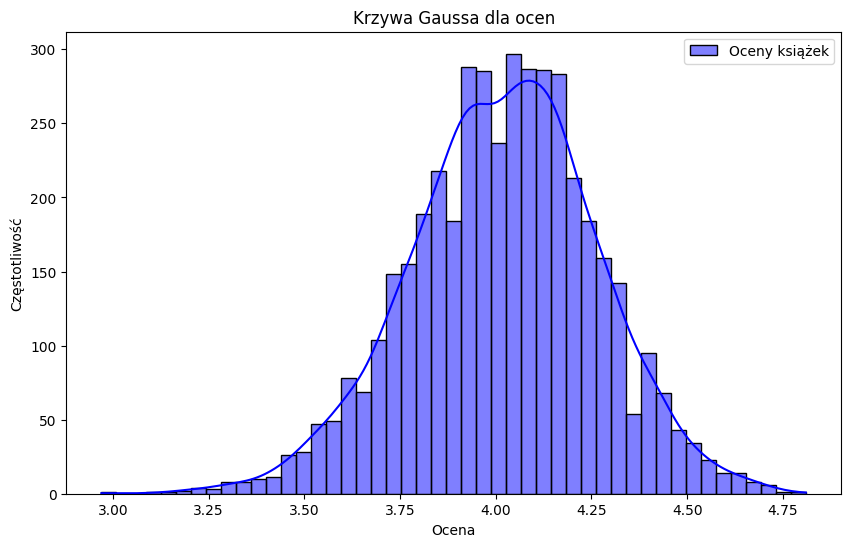

In [17]:
rating_column = 'Rating'

mean_rating = df[rating_column].mean()
std_dev_rating = df[rating_column].std()

num_samples = len(df)

plt.figure(figsize=(10, 6))
sns.histplot(df[rating_column], kde=True, color='blue', label='Oceny książek')
plt.title('Krzywa Gaussa dla ocen')
plt.xlabel('Ocena')
plt.ylabel('Częstotliwość')
plt.legend()
plt.savefig('static/chart/bell1')

plt.show()


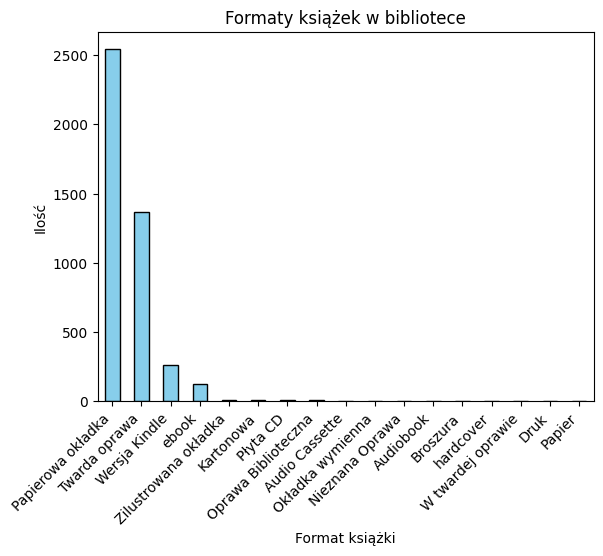

In [18]:
format_counts = df['Format'].value_counts()

# Plotting the bar chart
format_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Formaty książek w bibliotece')
plt.xlabel('Format książki')
plt.ylabel('Ilość')
plt.xticks(rotation=45, ha='right')
plt.savefig('static/chart/bar1')

plt.show()

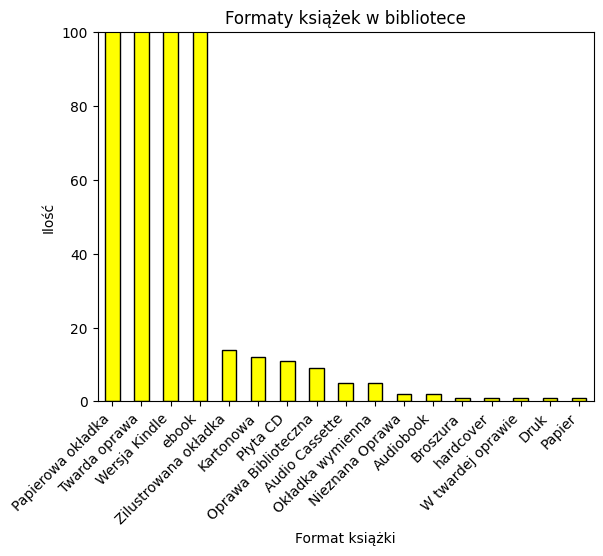

In [19]:
ax = format_counts.plot(kind='bar', color='yellow', edgecolor='black')
ax.set_ylim(0, 100)  # Set y-axis limit
plt.title('Formaty książek w bibliotece')
plt.xlabel('Format książki')
plt.ylabel('Ilość')
plt.xticks(rotation=45, ha='right')
plt.savefig('static/chart/bar2')
plt.show()

In [20]:
# df['Publication Date'] = df['Publication Date'].str.extract(r'(\w+ \d+, \d+)', expand=False)

df['Publication Date'] = pd.to_datetime(df['Publication Date'], format='%B %d, %Y')

# Extract the year from the datetime column
df['Year'] = df['Publication Date'].dt.year

df_filtered = df[(df['Year'] >= 1980) & (df['Year'] <= 2023)]

# Plotting the line chart
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
ax = df_filtered['Year'].value_counts().sort_index().plot(kind='line', color='green', marker='', linestyle='-')
ax.set_xlim(1980, 2023)  # Set x-axis limit
ax.set_ylim(80, 120)  # Set y-axis limit
plt.title('Ilość książek opublikowanych w czasie (1980-2023)')
plt.xlabel('Rok Publikacji')
plt.ylabel('Wolumen')
plt.grid(True)
plt.savefig('static/chart/linear1')

plt.show()

ValueError: time data "Published November 10, 2004" doesn't match format "%B %d, %Y", at position 170. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.